# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

 * Conclusions: As we observed the 3 trends over the course of 45 Days of 249 mice from "Pymaceuticals Inc"; The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.

1. Looking at the data for the Capomulin drug regimen compared to the others like Ramicane is showing equal results if not slightly greater average tumor volume (mm3) at Capomulin showing 40.6 mm3 to Ramicane showing average tumor volume of 40.2. The worse average tumor volume of the 20 drug regimens was Katapril at 55.2 mm3.

2. Ketapril seemed to be the worse of the lowest drug treatments per the bar chart. There really isn't a great different on whether the mouse was female or male to determine if the drug treatments made a difference either. Propriva also shows that

3. Capomulin seems to be a the first good drug for this type of tumor or treatment. Ceftamin shows that during 45 days the tumor volume decreased to about 41% in volume the more days the mouse i509 was treated. Ramicane would be a good alternative due to the numbers are similar.
 

In [ ]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
#In this study, 249 mice & 1893 identified with SCC tumor growth were treated through a variety of drug regimens.
number_of_mice = len(mouse_metadata["Mouse ID"])
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
# Study Results are showing Mouse ID that is showing to be repeated in both the dataframes are "g989"
dup_mouse = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Droping Duplicate Mouse ID g989 rows found in duplicated data above
# This particular Mouse ID g989 has 13 rows 
dup_mouse_id = dup_mouse.drop_duplicates()
dup_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Mouse_DF = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] != 'g989']     
Clean_Mouse_DF = pd.DataFrame(Clean_Mouse_DF)
Clean_Mouse_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_of_mice = Clean_Mouse_DF["Mouse ID"].value_counts()
clean_of_mice

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Note to self there are 10 drugs total 
#List of Drugs" Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol"
# NOTE TO SELF USE FOR SAMPLE DATA FORMATING: https://gt.bootcampcontent.com/GT-Coding-Boot-Camp/gt-atl-data-pt-03-2020-u-c/blob/master/05-Matplotlib/2/Activities/01-Stu_PlotsReview/Solved/plot_drills.ipynb
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Clean_Mouse_DF.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_stats = Clean_Mouse_DF[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_volume_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_df['Median Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).median()
tumor_df['Variance Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).var()
tumor_df['Std. Dev. Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).std()
tumor_df['Std.Err Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).sem()
tumor_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std.Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_data = tumor_volume_stats.groupby(['Drug Regimen'])
agg_stats = agg_data['Tumor Volume (mm3)'].agg(['mean','median','std','var','sem'])
agg_stats

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

In [17]:
#Data Set for Bar Plot
#drug regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
#mouse count: [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
mice_per_treatment_df = Clean_Mouse_DF.groupby(['Drug Regimen']).count()['Mouse ID']
mice_per_treatment_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

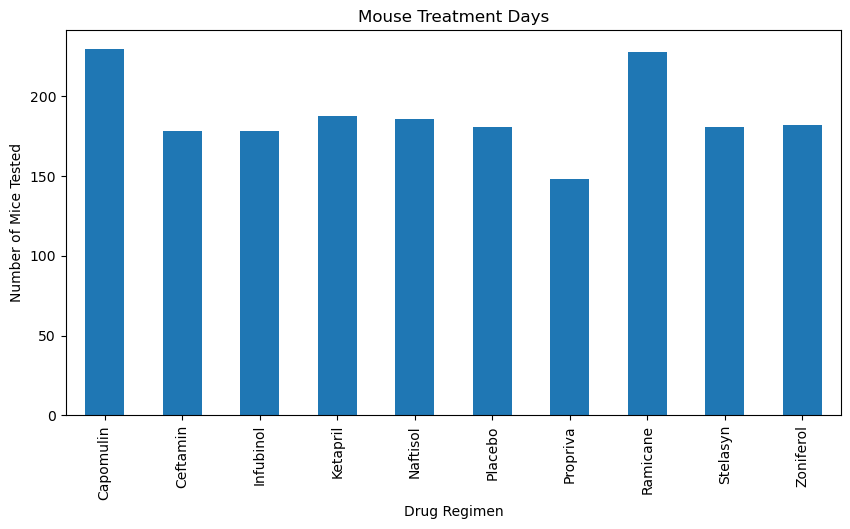

<Figure size 640x480 with 0 Axes>

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# use pandas.DataFrame.plot()
mice_per_treatment_df.plot(kind="bar", figsize=(10,5))

plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

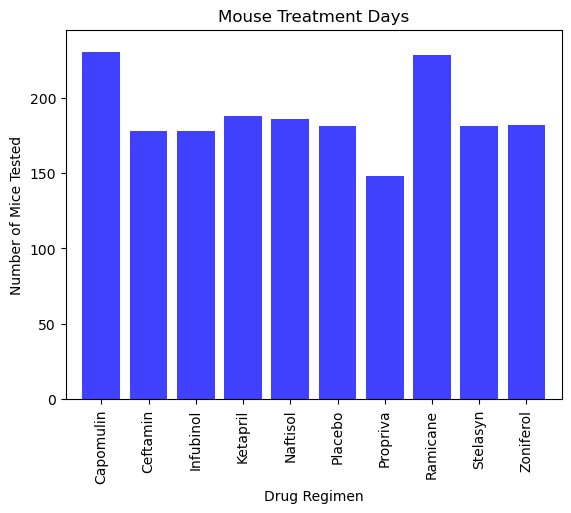

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#https://gt.bootcampcontent.com/GT-Coding-Boot-Camp/gt-atl-data-pt-03-2020-u-c/blob/master/05-Matplotlib/2/Activities/01-Stu_PlotsReview/Solved/plot_drills.ipynb
#use matplotlib.pyplot()
treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
days = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

treatment = np.arange(len(mice_per_treatment_df))
tick_locations = []
for x in treatment:
    tick_locations.append(x)
    
plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(treatment)-0.25)
plt.ylim(0, max(days) + 15)

plt.bar(treatment, days, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.show()


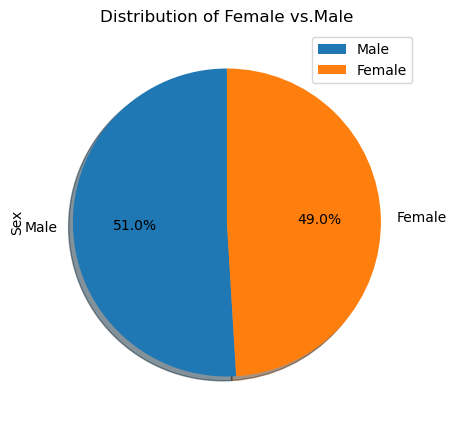

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = Clean_Mouse_DF ['Sex'].value_counts()
gender_count
gender_df = pd.DataFrame(gender_count)
pandas_plot = gender_df.plot.pie(y='Sex',figsize=(5,5),autopct="%1.1f%%", shadow=True, startangle=90, title='Distribution of Female vs.Male')

Text(0.5, 1.0, 'Distribution of Female vs. Male')

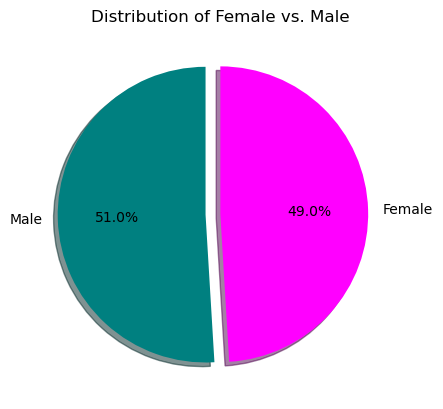

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df
labels = ['Male', 'Female']
sizes = [958, 922]
colors = ['teal', 'magenta']
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90,)
plt.title('Distribution of Female vs. Male')


## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list_df = Clean_Mouse_DF.loc[(Clean_Mouse_DF["Drug Regimen"] == "Capomulin") | (Clean_Mouse_DF["Drug Regimen"] == "Ramicane" )|
                           (Clean_Mouse_DF["Drug Regimen"] == "Infubinol") | (Clean_Mouse_DF["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
groupedby_drug_list_df = drug_list_df.groupby("Mouse ID")
greatest_timepoint = groupedby_drug_list_df["Timepoint"].max()
greatest_vol = groupedby_drug_list_df['Tumor Volume (mm3)'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_sts_df=pd.DataFrame()
final_sts_df['Timepoint']=greatest_timepoint
final_sts_df['Last Volume']=greatest_vol
merged_df=pd.merge(final_sts_df,Clean_Mouse_DF,how='left',on=['Mouse ID','Timepoint'])
cleaned_Mouse_Df=merged_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
cleaned_grouped=cleaned_Mouse_Df.groupby(['Drug Regimen','Mouse ID'])
cleaned_Mouse_Df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [107]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_drug:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = cleaned_Mouse_Df.loc[cleaned_Mouse_Df['Drug Regimen']== i, 'Tumor Volume (mm3)']
    tumor_data.append(final_tumor_vol)
    
    # add subset 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    
    # Determine outliers using upper and lower bounds
    lowerq = round(quartiles[0.25], 3)
    upperq = round(quartiles[0.75], 3)
    iqr = round(upperq-lowerq, 3)
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{i}'s outliers: {outliers}")

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
group_drug = merged_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
group_drug_df = grouped_drug_to_frame()

#Create a list to use as labels and dataframe
tumor_df = grouped_drug_df.reset_index()
tumor_lists = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_lists_df = pd.DataFrame(tumor_lists)
tumor_lists_df = tumor_lists_df.reindex(treatment_drug)
tumor_vols = [vol for vol in tumor_lists_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=treatment_drug)
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

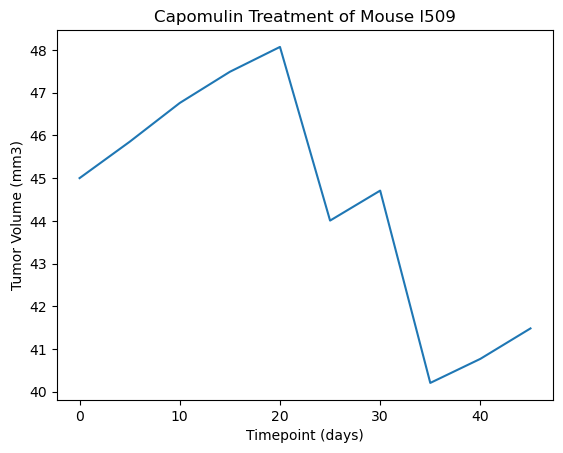

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_drug_df = combined_mouse_df.loc[(combined_mouse_df["Drug Regimen"] == "Capomulin"), :]
mouse_l509 = capomulin_drug_df.loc[(capomulin_drug_df["Mouse ID"] == "l509"), :]

mouse_l509_timepoint = mouse_l509["Timepoint"]
mouse_l509_tumor_vol = mouse_l509["Tumor Volume (mm3)"]

plt.plot(mouse_l509_timepoint, mouse_l509_tumor_vol)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

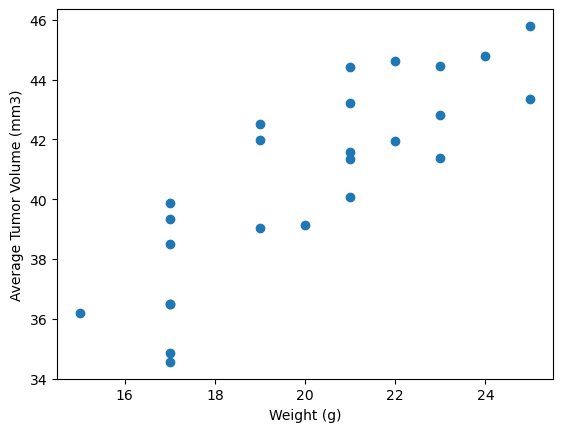

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = capomulin_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight
avg_tumor_vol

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

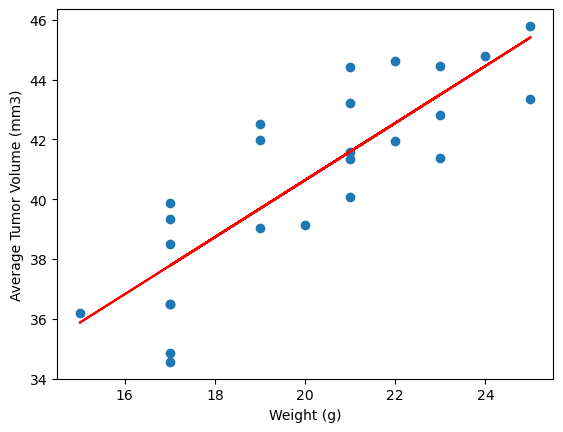

The correlation between mouse weight and the average tumor volume is 0.84.


In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight
avg_tumor_vol

plt.scatter(mouse_weight, avg_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
line_regression_val = (mouse_weight * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(mouse_weight, line_regression_val, "r-")
#plt.annotate(line_eq, (0, 50), fontsize = 15, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:,.2f}.")
